<a href="https://colab.research.google.com/github/Qm1ne/Project_2/blob/main/Hotel_reservation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

Import Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline

Importing Data

In [ ]:
# Load Data (https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)
file_path = '/content/drive/MyDrive/CODING DOJO /Projects/Project 2/Hotel Reservations.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
df[df.duplicated(keep=False)]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [ ]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df["booking_status"].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [ ]:
df["market_segment_type"].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [ ]:
df["room_type_reserved"].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [ ]:
df["type_of_meal_plan"].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

Going to drop booking ID because I don't see any value in it

In [ ]:
df=df.drop(columns=['Booking_ID'])


In [ ]:
df.describe().round()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.0,36275.0,36275.0,36275.0,36275.0,36275.0,36275.0,36275.0,36275.0,36275.0,36275.0,36275.0,36275.0,36275.0
mean,2.0,0.0,1.0,2.0,0.0,85.0,2018.0,7.0,16.0,0.0,0.0,0.0,103.0,1.0
std,1.0,0.0,1.0,1.0,0.0,86.0,0.0,3.0,9.0,0.0,0.0,2.0,35.0,1.0
min,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,2.0,0.0,0.0,1.0,0.0,17.0,2018.0,5.0,8.0,0.0,0.0,0.0,80.0,0.0
50%,2.0,0.0,1.0,2.0,0.0,57.0,2018.0,8.0,16.0,0.0,0.0,0.0,99.0,0.0
75%,2.0,0.0,2.0,3.0,0.0,126.0,2018.0,10.0,23.0,0.0,0.0,0.0,120.0,1.0
max,4.0,10.0,7.0,17.0,1.0,443.0,2018.0,12.0,31.0,1.0,13.0,58.0,540.0,5.0


In [ ]:
df["no_of_children"].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

Only one row with 10 children, it's kind of strange but can be a school trip as there are two 9 children values!
For now I will not delete the rows and I may try to delete it later on and see if there are any changes.

The data seems clean enough the only problems will come with balancing

<ipython-input-37-574bc409863c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, ax=ax)


<Axes: >

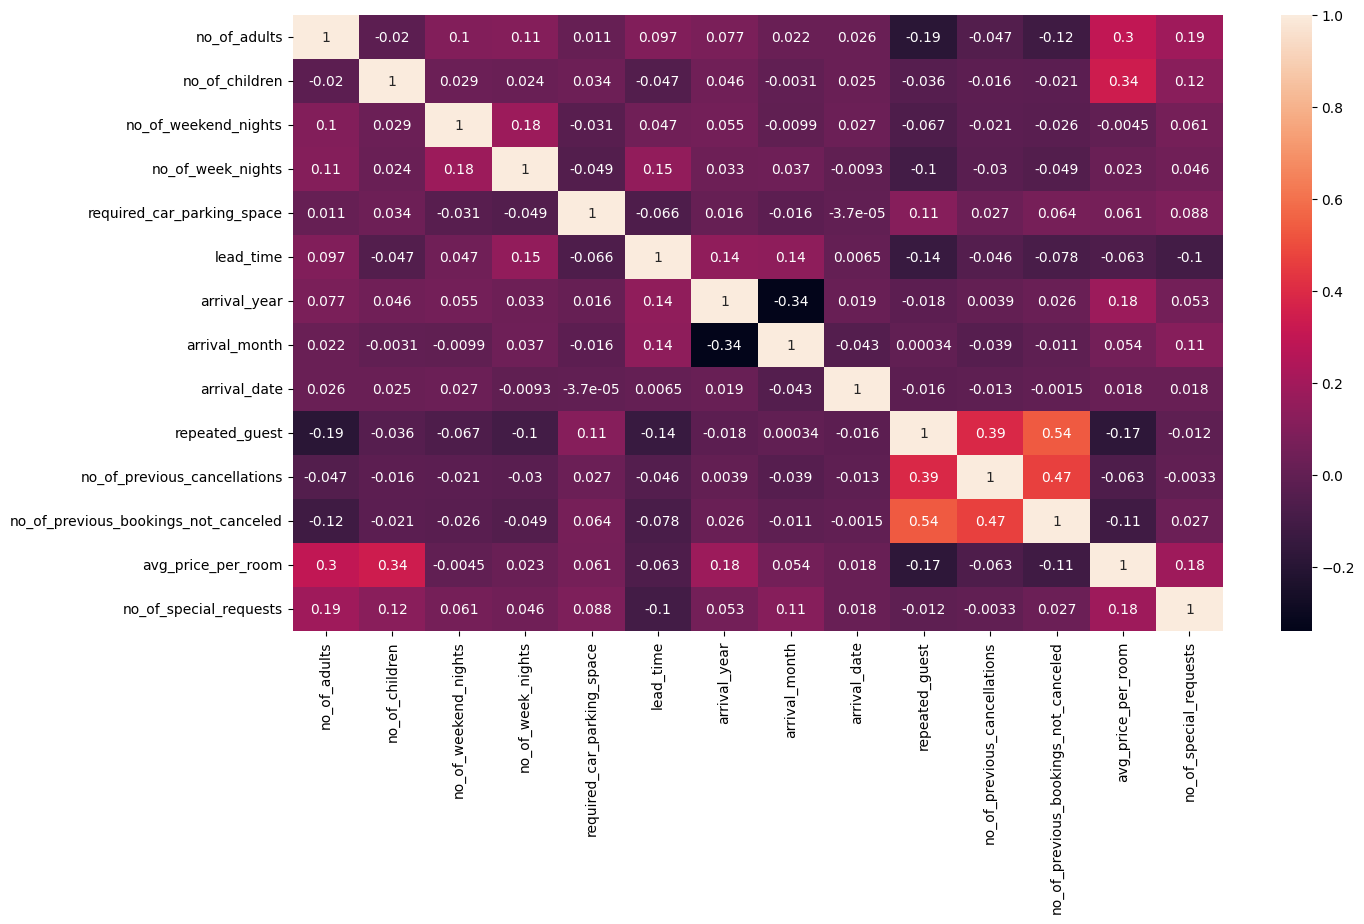

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, ax=ax)

In [ ]:
def plot_bar(data,x, y, figsize=(10,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot

    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

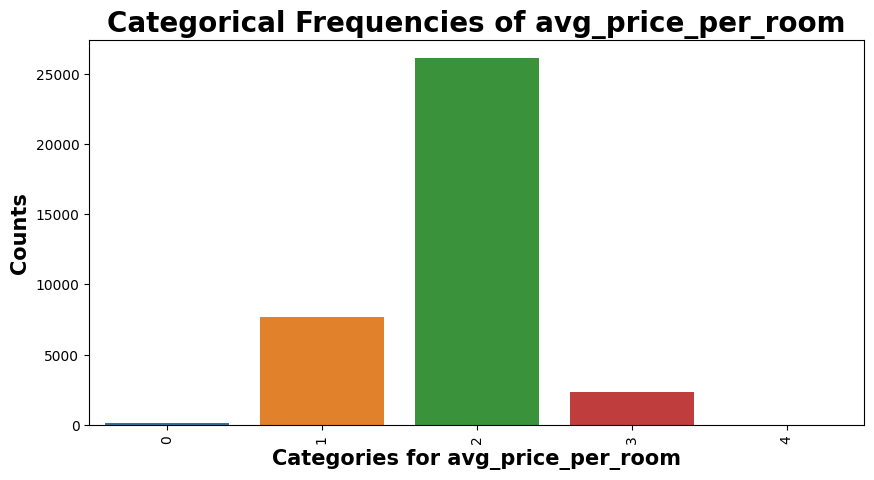

In [ ]:
plot_bar(df, 'no_of_adults', 'avg_price_per_room');


(array([1.3900e+02, 0.0000e+00, 7.6950e+03, 0.0000e+00, 0.0000e+00,
        2.6108e+04, 0.0000e+00, 2.3170e+03, 0.0000e+00, 1.6000e+01]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

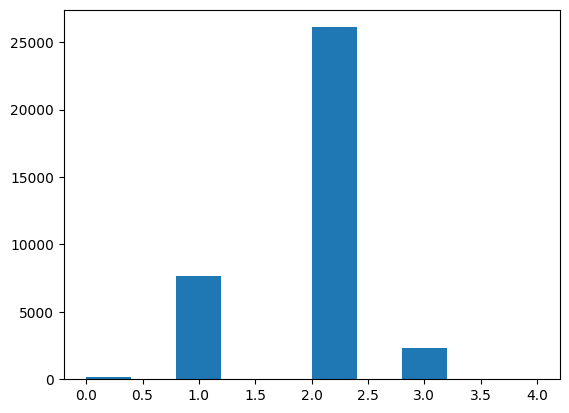

In [ ]:
plt.hist(df['no_of_adults'])

<Axes: xlabel='arrival_month'>

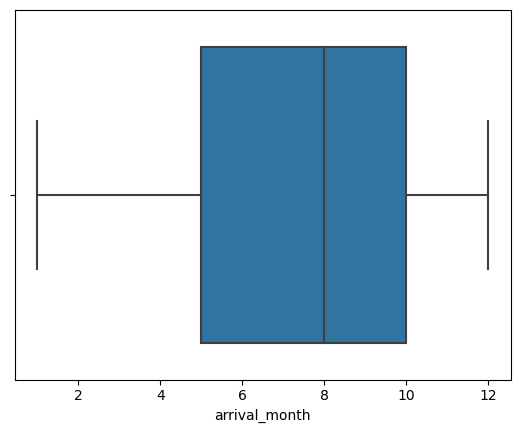

In [ ]:
sns.boxplot(x=df["arrival_month"])